In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-poster')

## Tutorials

* solve_ivp:
   *  https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations
   * https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.06-Python-ODE-Solvers.html
* seaborn styles:      https://zhauniarovich.com/post/2022/2022-12-styling-matplotlib-graphs-with-seaborn/       

## Exponential decay

In [3]:
# ds/dt = F(t,s)

def F(t,s):
  return(-s)



In [4]:
t_eval = np.arange(0,1.01,0.01)
sol = solve_ivp(F, t_span=[0,1], y0=[1], t_eval=t_eval)


In [5]:
def plot(sol):
  plt.figure(figsize=(12,4))
  plt.subplot(121)
  plt.plot(sol.t,sol.y[0])
  plt.xlabel('t')

  plt.subplot(122)
  plt.plot(sol.t,sol.y[0]-np.exp(-sol.t))
  plt.xlabel('t')

  plt.tight_layout()
  plt.show()

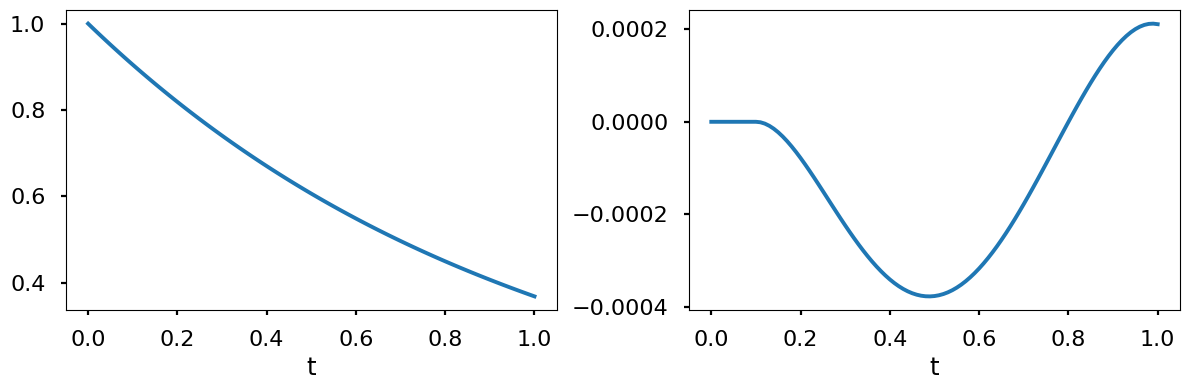

In [6]:
plot(sol)


In [7]:
t_eval = np.arange(0,1.01,0.01)
sol = solve_ivp(F, t_span=[0,1], y0=[1], t_eval=t_eval, atol=1e-8, rtol=1e-8)


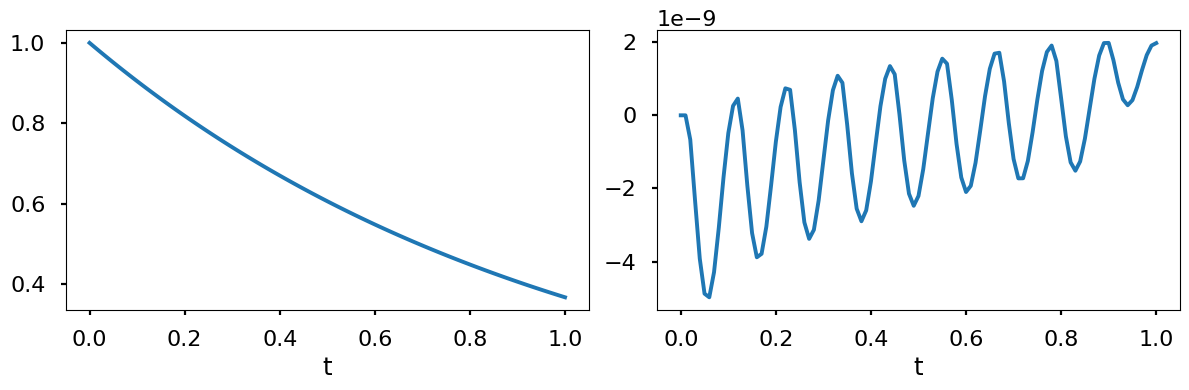

In [8]:
plot(sol)

## ODE systems

In [9]:
# Lorenz attractor:
# dx/dt = sigma * (y - x)
# dy/dt = rho * x - x * z - y
# dz/dt = x * y - beta * z

# s = (x,y,z)

def F2(t,s):
        x,y,z = s[0], s[1], s[2]
        return ([
            sigma * (y - x),
            rho * x - x * z - y,
            x * y - beta * z
        ])

In [10]:
sigma=10
rho=28
beta=8/3

t_eval = np.arange(0,30.01,0.01)
sol = solve_ivp(F2, t_span=[0,30], y0=[1,0,0], t_eval=t_eval, atol=1e-8, rtol=1e-8)

In [11]:
def plot(sol):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.plot(sol.t,sol.y[0])
  plt.xlabel('t')
  plt.ylabel('x')

  plt.subplot(132)
  plt.plot(sol.t,sol.y[1])
  plt.xlabel('t')
  plt.ylabel('y')

  plt.subplot(133)
  plt.plot(sol.t,sol.y[2])
  plt.xlabel('t')
  plt.ylabel('z')

  plt.tight_layout()
  plt.show()

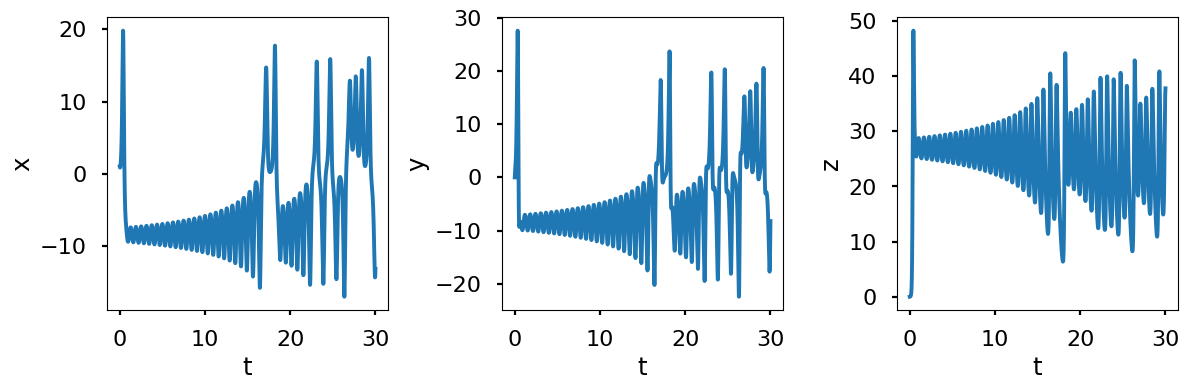

In [12]:
plot(sol)

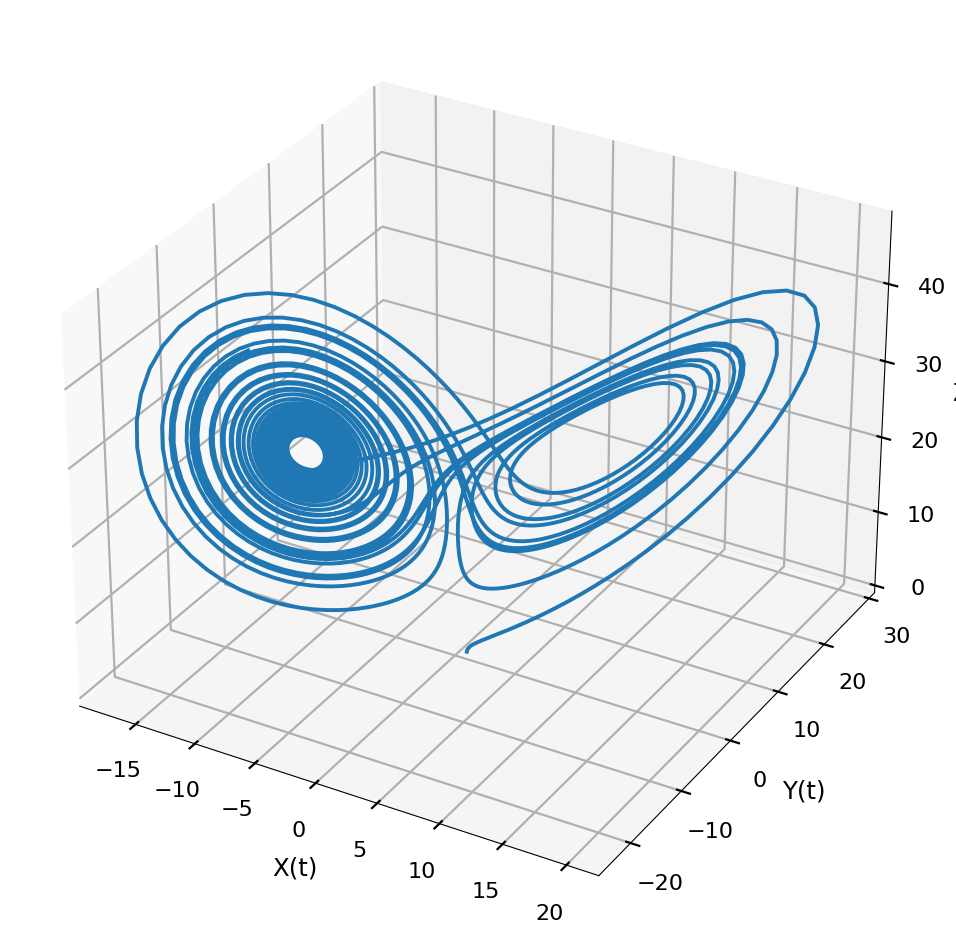

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X(t)', labelpad=20)
ax.set_ylabel('Y(t)', labelpad=20)
ax.set_zlabel('Z(t)', labelpad=20)
plt.show()

# Spreading

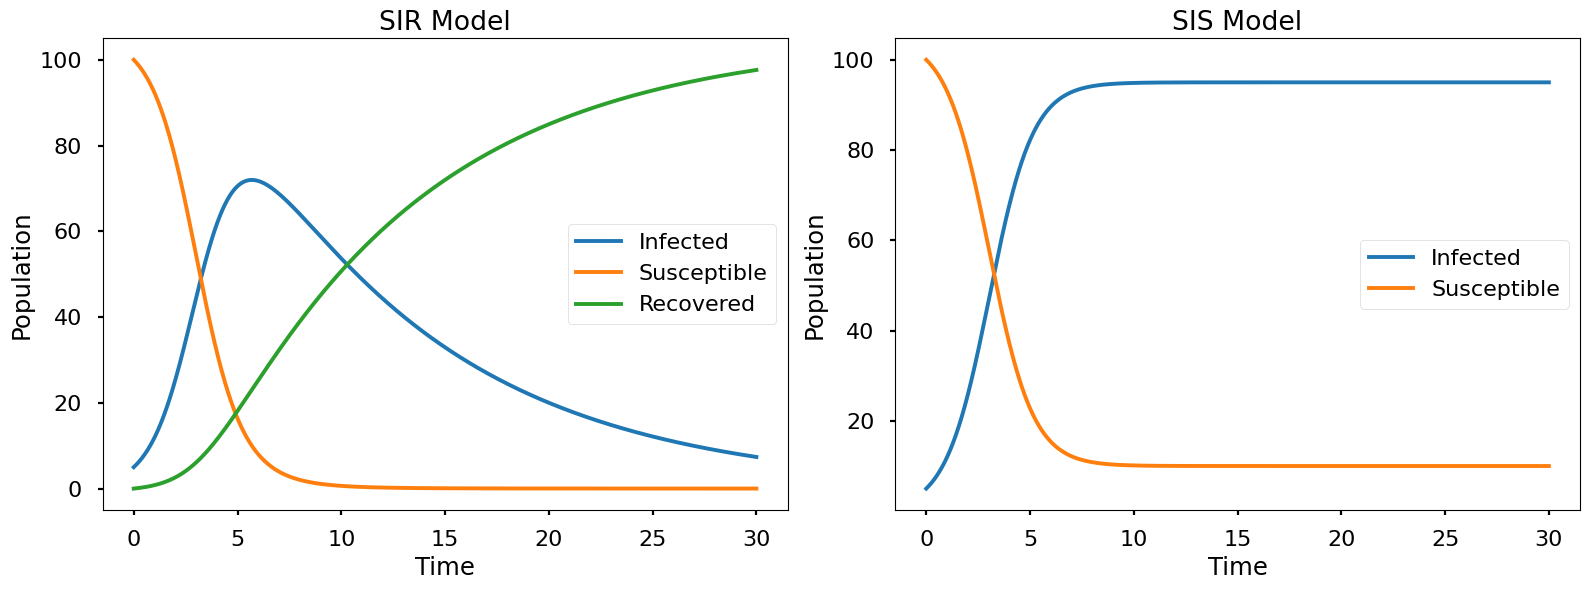

In [17]:
beta = 0.01
mu = 0.1

def SIR(t,s):
    I, S = s[0], s[1]
    return([
        beta * I * S - mu * I,
        - beta * I * S
    ])

def SIS(t,s):
    I, S = s[0], s[1]
        
    return([
        beta * I * S - mu * I,
        - beta * I * S + mu * I
    ])



t_eval = np.arange(0,30.01,0.01)
sol_one_SIR = solve_ivp(SIR, t_span=[0,30], y0=[5,100], t_eval=t_eval, atol=1e-8, rtol=1e-8)
sol_one_SIS = solve_ivp(SIS, t_span=[0,30], y0=[5,100], t_eval=t_eval, atol=1e-8, rtol=1e-8)

# plotting by claude-3.5-sonnet

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot SIR model
ax1.plot(sol_one_SIR.t, sol_one_SIR.y[0], label='Infected')
ax1.plot(sol_one_SIR.t, sol_one_SIR.y[1], label='Susceptible')
ax1.plot(sol_one_SIR.t, 105 - sol_one_SIR.y[0] - sol_one_SIR.y[1], label='Recovered') # cool line claude, good job
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('SIR Model')
ax1.legend()

# Plot SIS model
ax2.plot(sol_one_SIS.t, sol_one_SIS.y[0], label='Infected')
ax2.plot(sol_one_SIS.t, sol_one_SIS.y[1], label='Susceptible')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title('SIS Model')
ax2.legend()

plt.tight_layout()
plt.show()

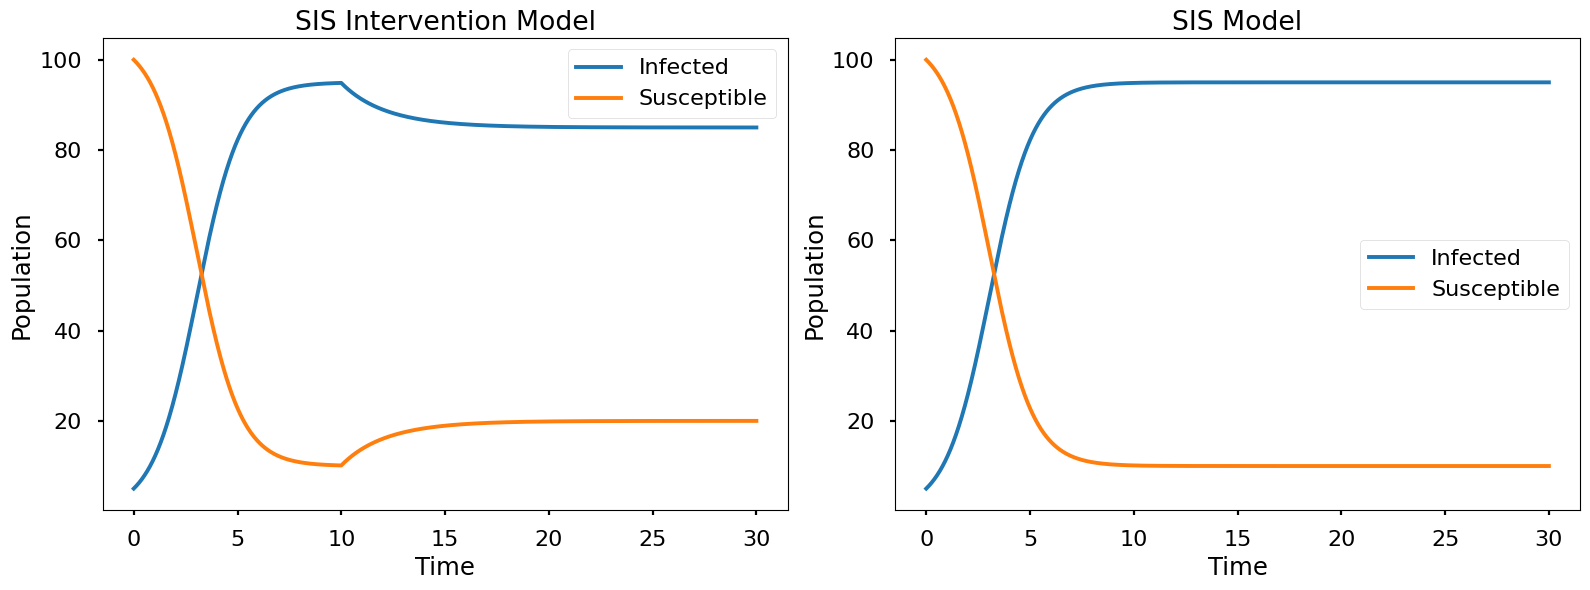

In [25]:
intervention_time = 10
intervention_beta = beta * 0.5
def SIS_intervention(t,s):
    I, S = s[0], s[1]
    if t > intervention_time:
        return([
        intervention_beta * I * S - mu * I,
        - intervention_beta * I * S + mu * I
    ])
        
    return([
        beta * I * S - mu * I,
        - beta * I * S + mu * I
    ])

def SIS(t,s):
    I, S = s[0], s[1]
        
    return([
        beta * I * S - mu * I,
        - beta * I * S + mu * I
    ])

t_eval = np.arange(0,30.01,0.01)
sol_one_SIS_intervention = solve_ivp(SIS_intervention, t_span=[0,30], y0=[5,100], t_eval=t_eval, atol=1e-8, rtol=1e-8)
sol_one_SIS = solve_ivp(SIS, t_span=[0,30], y0=[5,100], t_eval=t_eval, atol=1e-8, rtol=1e-8)

# plotting by claude-3.5-sonnet

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot SIR model
ax1.plot(sol_one_SIS_intervention.t, sol_one_SIS_intervention.y[0], label='Infected')
ax1.plot(sol_one_SIS_intervention.t, sol_one_SIS_intervention.y[1], label='Susceptible')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('SIS Intervention Model')
ax1.legend()

# Plot SIS model
ax2.plot(sol_one_SIS.t, sol_one_SIS.y[0], label='Infected')
ax2.plot(sol_one_SIS.t, sol_one_SIS.y[1], label='Susceptible')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title('SIS Model')
ax2.legend()

plt.tight_layout()
plt.show()

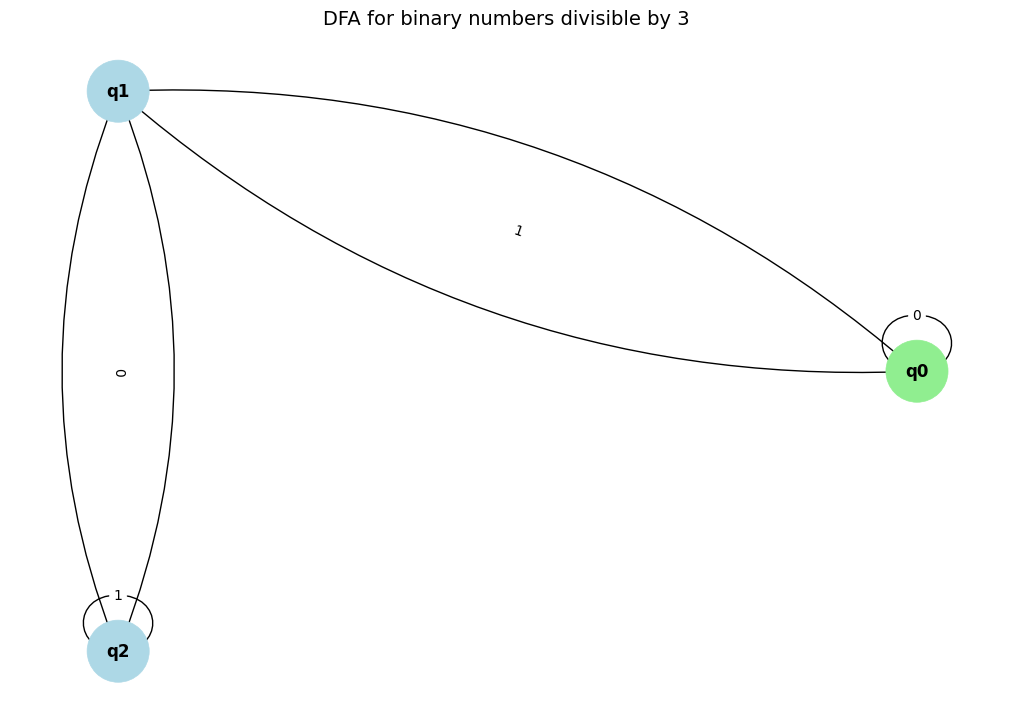

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Define states and transitions
states = ['q0', 'q1', 'q2']
transitions = {
    ('q0', '0'): 'q0',
    ('q0', '1'): 'q1',
    ('q1', '0'): 'q2',
    ('q1', '1'): 'q0',
    ('q2', '0'): 'q1',
    ('q2', '1'): 'q2'
}

# Build directed graph
G = nx.MultiDiGraph()
for state in states:
    G.add_node(state)
for (src, sym), dst in transitions.items():
    G.add_edge(src, dst, label=sym)

# Layout
pos = nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=['lightgreen' if s=='q0' else 'lightblue' for s in states])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edges with labels
edges = G.edges(keys=True)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3, rad=0.2', arrows=True)
edge_labels = {(u, v): d['label'] for u, v, k, d in G.edges(keys=True, data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("DFA for binary numbers divisible by 3", fontsize=14)
plt.axis('off')
plt.show()